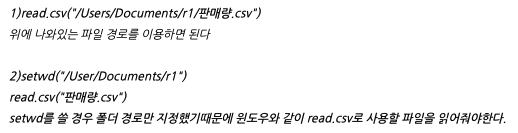

/Users/kyle/Desktop/AH_연구/Depression/Depression_Adolescents.txt

In [3]:
#1.txt불러오기(sentences)
txt = open("/Users/kyle/Desktop/AH_연구/Depression/Depression_Adolescents.txt", 'r')
lines = txt.readlines()  # readlines 사용
sentences = ""
for line in lines:
    line = line.strip()  # 줄 끝의 줄 바꿈 문자를 제거한다
    sentences = sentences+ " " + line
txt.close()
print(sentences)

 ASSOCIATION BETWEEN SLEEP DEPRIVATION AND DEPRESSION AMONG ADOLESCENTS The Prospective Association between Sleep Deprivation and Depression among Adolescents Robert E. Roberts, PhD1; Hao T. Duong, MD, MPH, DrPh2 1Division of Health Promotion and Behavioral Sciences, UTHealth, School of Public Health, University of Texas Health Science Center, Houston, TX; 2Centers for Disease Control, Hanoi, Vietnam  http://dx.doi.org/10.5665/sleep.3388  Study Objectives: To examine the prospective, reciprocal association between sleep deprivation and depression among adolescents. Design: A community-based two-wave cohort study. Setting: A metropolitan area with a population of over 4 million. Participants: 4,175 youths 11-17 at baseline, and 3,134 of these followed up a year later. Measurements: Depression is measured using both symptoms of depression and DSM-IV major depression. Sleep deprivation is defined as ≤ 6 h of sleep per night. Results: Sleep deprivation at baseline predicted both measures o

In [4]:
#2.문장끊기(sent_split)
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize 
  
sent_split = sent_tokenize(sentences)
print(sent_split)
""" 줄바꿈(\n)이 있을 때 문장 끊기는 것을 방지하려고 (\n없애려고 readlines사용)
1) txt파일을 하나의 문자열로 만들어
2) sent tokenize으로 문장을 나누어보려 시도하였다"""
# 여기서 줄바꿈이 있는 문장은 잘 분리가 되지만 1)에서 "."이 없이 끝나는 문장끼리 더하면 2)에서 문장이 안쪼개짐...
# 첫 3문장("."으로 안끝나는 타이틀)이 그럼

[' ASSOCIATION BETWEEN SLEEP DEPRIVATION AND DEPRESSION AMONG ADOLESCENTS The Prospective Association between Sleep Deprivation and Depression among Adolescents Robert E. Roberts, PhD1; Hao T. Duong, MD, MPH, DrPh2 1Division of Health Promotion and Behavioral Sciences, UTHealth, School of Public Health, University of Texas Health Science Center, Houston, TX; 2Centers for Disease Control, Hanoi, Vietnam  http://dx.doi.org/10.5665/sleep.3388  Study Objectives: To examine the prospective, reciprocal association between sleep deprivation and depression among adolescents.', 'Design: A community-based two-wave cohort study.', 'Setting: A metropolitan area with a population of over 4 million.', 'Participants: 4,175 youths 11-17 at baseline, and 3,134 of these followed up a year later.', 'Measurements: Depression is measured using both symptoms of depression and DSM-IV major depression.', 'Sleep deprivation is defined as ≤ 6 h of sleep per night.', 'Results: Sleep deprivation at baseline predi

[nltk_data] Downloading package punkt to /Users/kyle/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


' 줄바꿈(\n)이 있을 때 문장 끊기는 것을 방지하려고 (\n없애려고 readlines사용)\n1) txt파일을 하나의 문자열로 만들어\n2) sent tokenize으로 문장을 나누어보려 시도하였다'

In [5]:
#3. 키워드 있는 문장 뽑기(sent_keyword)    - keywords = ["depression", "insomnia", "sleep deprivation"]
sent_keyword = []
for s in sent_split:
    if ("depression" or "insomnia" or "sleep deprivation") in s:
        sent_keyword.append(s)
print(sent_keyword)

[' ASSOCIATION BETWEEN SLEEP DEPRIVATION AND DEPRESSION AMONG ADOLESCENTS The Prospective Association between Sleep Deprivation and Depression among Adolescents Robert E. Roberts, PhD1; Hao T. Duong, MD, MPH, DrPh2 1Division of Health Promotion and Behavioral Sciences, UTHealth, School of Public Health, University of Texas Health Science Center, Houston, TX; 2Centers for Disease Control, Hanoi, Vietnam  http://dx.doi.org/10.5665/sleep.3388  Study Objectives: To examine the prospective, reciprocal association between sleep deprivation and depression among adolescents.', 'Measurements: Depression is measured using both symptoms of depression and DSM-IV major depression.', 'Results: Sleep deprivation at baseline predicted both measures of depression at follow-up, controlling for depression at baseline.', 'Examining the reciprocal association, major depression at baseline, but not symptoms predicted sleep deprivation at follow-up.', 'Conclusion: These results are the first to document reci

In [6]:
#4-1.Lemmatizer : 표제어 추출

#Lemmatize with POS Tag
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk import WordNetLemmatizer


def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

lemmatizer = WordNetLemmatizer()
sent_all = []
for s in sent_keyword:   #각 문장,s를 차례대로
    sent_each = ""
    
    for w in nltk.word_tokenize(s):   #한 문장 안의 각 단어,w를 차례대로 넣어 표제어 추출,저장
        l = lemmatizer.lemmatize(w, get_wordnet_pos(w))
        sent_each = sent_each + " " + l
        
    sent_all.append(sent_each)

[nltk_data] Downloading package wordnet to /Users/kyle/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kyle/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [7]:
#4-2. "sent_all"은 키워드가 포함되어 있는 문장의 단어를 표제어로 바꾸어 [ ['','',''] , ['','','',''] ,,,,] 형식으로 저장됨
                                                             #첫문장         두번째문장 . . .

for h in sent_all:
    print(h, end="\n")

 ASSOCIATION BETWEEN SLEEP DEPRIVATION AND DEPRESSION AMONG ADOLESCENTS The Prospective Association between Sleep Deprivation and Depression among Adolescents Robert E. Roberts , PhD1 ; Hao T. Duong , MD , MPH , DrPh2 1Division of Health Promotion and Behavioral Sciences , UTHealth , School of Public Health , University of Texas Health Science Center , Houston , TX ; 2Centers for Disease Control , Hanoi , Vietnam http : //dx.doi.org/10.5665/sleep.3388 Study Objectives : To examine the prospective , reciprocal association between sleep deprivation and depression among adolescent .
 Measurements : Depression be measure use both symptom of depression and DSM-IV major depression .
 Results : Sleep deprivation at baseline predict both measure of depression at follow-up , control for depression at baseline .
 Examining the reciprocal association , major depression at baseline , but not symptom predict sleep deprivation at follow-up .
 Conclusion : These result be the first to document recipr

In [8]:
#4-2. 표제어추출2

# NLTK
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

sent_all2 = []
for s in sent_keyword:
    sent_each2 =" ".join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(s)])
    sent_all2.append(sent_each2)

for h in sent_all2:
    print(h, end="\n")

ASSOCIATION BETWEEN SLEEP DEPRIVATION AND DEPRESSION AMONG ADOLESCENTS The Prospective Association between Sleep Deprivation and Depression among Adolescents Robert E. Roberts , PhD1 ; Hao T. Duong , MD , MPH , DrPh2 1Division of Health Promotion and Behavioral Sciences , UTHealth , School of Public Health , University of Texas Health Science Center , Houston , TX ; 2Centers for Disease Control , Hanoi , Vietnam http : //dx.doi.org/10.5665/sleep.3388 Study Objectives : To examine the prospective , reciprocal association between sleep deprivation and depression among adolescent .
Measurements : Depression be measure use both symptom of depression and DSM-IV major depression .
Results : Sleep deprivation at baseline predict both measure of depression at follow-up , control for depression at baseline .
Examining the reciprocal association , major depression at baseline , but not symptom predict sleep deprivation at follow-up .
Conclusion : These result be the first to document reciprocal 

# 4-3. 표제어 추출의 다른 방법(CLiP사용)
## -> [ "표제어문장1","표제어문장2"...] 이런형식 도출
!pip install pattern
import pattern
from pattern.en import lemma, lexeme
sent_all3 = []
for s in sent_keyword:
    sent_each3 = ""
    for w in s.split():
        sent_each3 = " ".join([lemma(wd)])
    sent_all3.append(sent_each3)
print(sent_all3)

# 2-2. 문장 끊기 다른방법
import re

punctuation = re.compile(r"([^\d+])(\.|!|\?|;|\n|。|！|？|；|…|　|!|؟|؛)+")
lines = []

with open('/Users/kyle/Desktop/AH_연구/Depression/Depression_Adolescents.txt','r',encoding="utf-8") as myFile:
    lines = punctuation.sub(r"\1\2<pad>", myFile.read())
    lines = [line.strip() for line in lines.split("<pad>") if line.strip()]
print(lines)
"""얘 같은 경우는 문장 가운에 줄 바뀌는 구간이 있으면 문장split할 때 2개로 나눠진다"""

# POS 이런 형식으로 출력?
from pattern.en import parse
print(parse('The striped bats were hanging on their feet and ate best fishes', 
            lemmata=True, tags=False, chunks=False))
#> The/DT/the striped/JJ/striped bats/NNS/bat were/VBD/be hanging/VBG/hang on/IN/on their/PRP$/their 
#>  feet/NNS/foot and/CC/and ate/VBD/eat best/JJ/best fishes/NNS/fish

In [22]:
#Pos Tagging : ([(단어,문법),(단어,문법))],  [(단어,문법),(단어,문법)],,,,)
import nltk

sent_tokens = []
for sentence in sent_all2:
    tokens=nltk.word_tokenize(sentence)
    tagged=nltk.pos_tag(tokens)
    sent_tokens.append(tagged)
    
for h in sent_tokens:
    print(h, end="\n")

[('ASSOCIATION', 'NNP'), ('BETWEEN', 'NNP'), ('SLEEP', 'NNP'), ('DEPRIVATION', 'NNP'), ('AND', 'NNP'), ('DEPRESSION', 'NNP'), ('AMONG', 'NNP'), ('ADOLESCENTS', 'NNP'), ('The', 'DT'), ('Prospective', 'NNP'), ('Association', 'NNP'), ('between', 'IN'), ('Sleep', 'NNP'), ('Deprivation', 'NNP'), ('and', 'CC'), ('Depression', 'NNP'), ('among', 'IN'), ('Adolescents', 'NNP'), ('Robert', 'NNP'), ('E.', 'NNP'), ('Roberts', 'NNP'), (',', ','), ('PhD1', 'NNP'), (';', ':'), ('Hao', 'NNP'), ('T.', 'NNP'), ('Duong', 'NNP'), (',', ','), ('MD', 'NNP'), (',', ','), ('MPH', 'NNP'), (',', ','), ('DrPh2', 'NNP'), ('1Division', 'CD'), ('of', 'IN'), ('Health', 'NNP'), ('Promotion', 'NNP'), ('and', 'CC'), ('Behavioral', 'NNP'), ('Sciences', 'NNPS'), (',', ','), ('UTHealth', 'NNP'), (',', ','), ('School', 'NNP'), ('of', 'IN'), ('Public', 'NNP'), ('Health', 'NNP'), (',', ','), ('University', 'NNP'), ('of', 'IN'), ('Texas', 'NNP'), ('Health', 'NNP'), ('Science', 'NNP'), ('Center', 'NNP'), (',', ','), ('Houston',

In [23]:
#Pos Tagging : ([(단어,문법),(단어,문법))],  [(단어,문법),(단어,문법)],,,,)
import nltk

sent_tokens = []
for sentence in sent_keyword:
    tokens=nltk.word_tokenize(sentence)
    tagged=nltk.pos_tag(tokens)
    sent_tokens.append(tagged)
    
for h in sent_tokens:
    print(h, end="\n")

[('ASSOCIATION', 'NNP'), ('BETWEEN', 'NNP'), ('SLEEP', 'NNP'), ('DEPRIVATION', 'NNP'), ('AND', 'NNP'), ('DEPRESSION', 'NNP'), ('AMONG', 'NNP'), ('ADOLESCENTS', 'NNP'), ('The', 'DT'), ('Prospective', 'NNP'), ('Association', 'NNP'), ('between', 'IN'), ('Sleep', 'NNP'), ('Deprivation', 'NNP'), ('and', 'CC'), ('Depression', 'NNP'), ('among', 'IN'), ('Adolescents', 'NNP'), ('Robert', 'NNP'), ('E.', 'NNP'), ('Roberts', 'NNP'), (',', ','), ('PhD1', 'NNP'), (';', ':'), ('Hao', 'NNP'), ('T.', 'NNP'), ('Duong', 'NNP'), (',', ','), ('MD', 'NNP'), (',', ','), ('MPH', 'NNP'), (',', ','), ('DrPh2', 'NNP'), ('1Division', 'CD'), ('of', 'IN'), ('Health', 'NNP'), ('Promotion', 'NNP'), ('and', 'CC'), ('Behavioral', 'NNP'), ('Sciences', 'NNPS'), (',', ','), ('UTHealth', 'NNP'), (',', ','), ('School', 'NNP'), ('of', 'IN'), ('Public', 'NNP'), ('Health', 'NNP'), (',', ','), ('University', 'NNP'), ('of', 'IN'), ('Texas', 'NNP'), ('Health', 'NNP'), ('Science', 'NNP'), ('Center', 'NNP'), (',', ','), ('Houston',